# Importamos librerías

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

# Definimos ruta y leemos dataset

In [2]:
ruta_output = '../data/titanic.csv'

titanic = pd.read_csv(ruta_output, sep = ';')

In [3]:
seed = 1234

# Verificación de datos

In [4]:
print(titanic.shape)

(887, 8)


In [5]:
titanic.head()

,Name,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Survived
0,Mr. Owen Harris Braund,3,male,22.0,1,0,7.2500,0
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,female,38.0,1,0,71.2833,1
2,Miss. Laina Heikkinen,3,female,26.0,0,0,7.9250,1
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,female,35.0,1,0,53.1000,1
4,Mr. William Henry Allen,3,male,35.0,0,0,8.0500,0


## Tratamiento de variables categóricas

Convertimos la variable sex en una dummy, que tome el valor (0,1) en función del sexo del pasajero

In [6]:
# Convertir variables categóricas a variables dummy
titanic['Sex'] = LabelEncoder().fit_transform(titanic['Sex'])

In [7]:
titanic = titanic.drop(['Name'], axis=1)

Separamos la variable objetivo 'Survived' para que el modelo trate de predecirla

In [8]:

# Eliminar la columna de `survived` como objetivo (`y`) y las otras como características (`X`)
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Separamos en train y test

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


# Creamos el modelo y vemos su scoring

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Instanciación del modelo
clf = DecisionTreeClassifier(random_state=seed)
clf.fit(X_train, y_train)  # Entrenamiento del modelo


DecisionTreeClassifier(random_state=1234)

In [11]:
print(clf.score(X_test, y_test))

0.797752808988764


In [12]:
y_pred = clf.predict(X_test)
y_pred


array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1], dtype=int64)

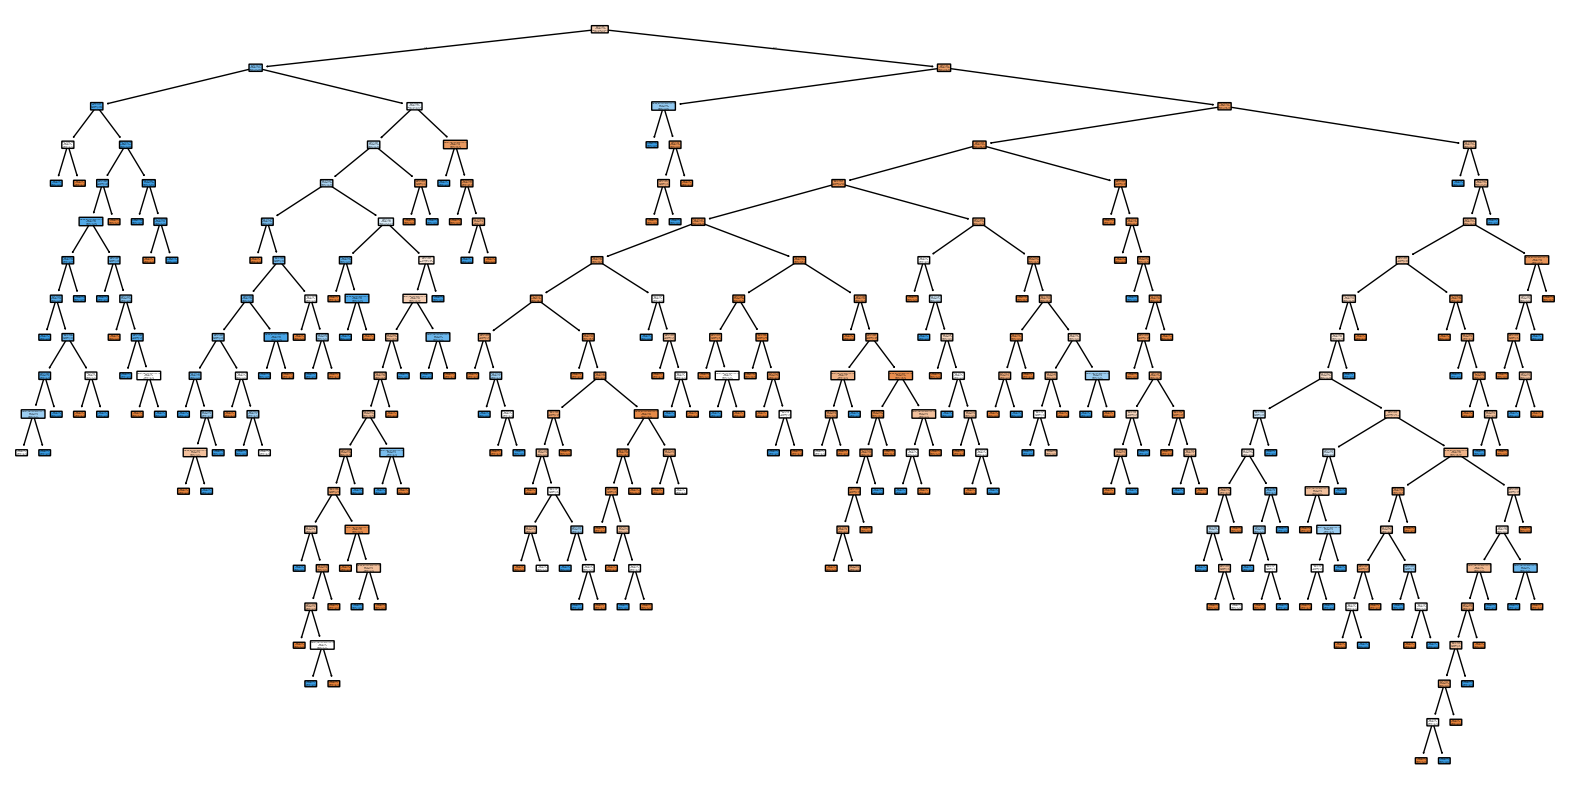

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Tamaño de la figura

# Visualización del árbol de decisión
plot_tree(
    clf, 
    filled=True,        # Colores para diferenciar las clases
    feature_names=titanic.columns,  # Nombres de las características (columnas del dataframe)
    class_names=["Clase 0", "Clase 1"],  # Etiquetas de las clases
    rounded=True,       # Bordes redondeados para un mejor estilo
)

plt.show()

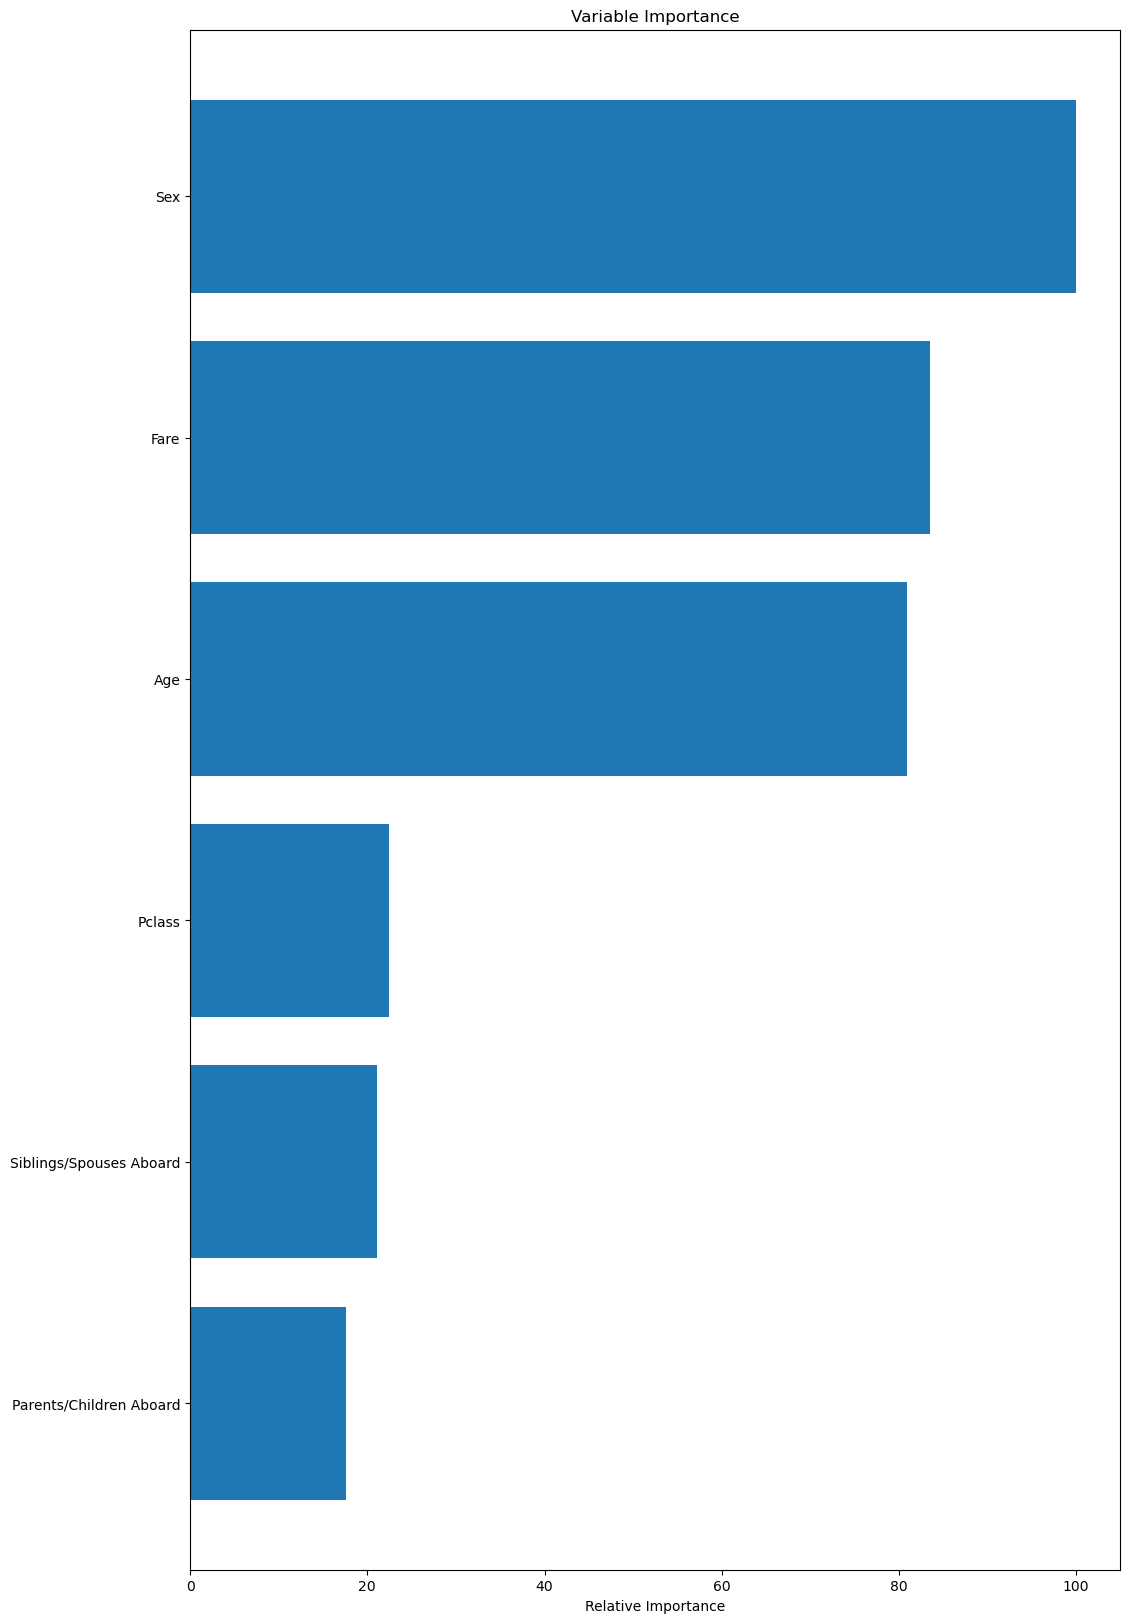

In [14]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(12, 20))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Confusion Matrix

términos absolutos

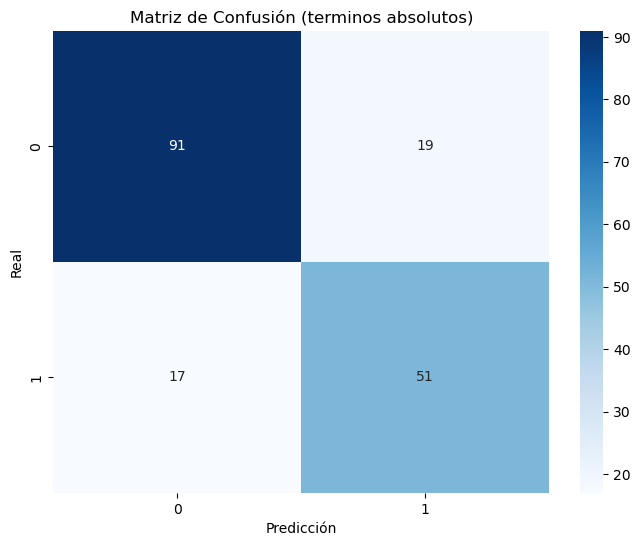

In [15]:
from sklearn.metrics import confusion_matrix

cm_absolutes = confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_absolutes, annot=True, cmap="Blues", cbar=True)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión (terminos absolutos)")
plt.show()

Términos relativos

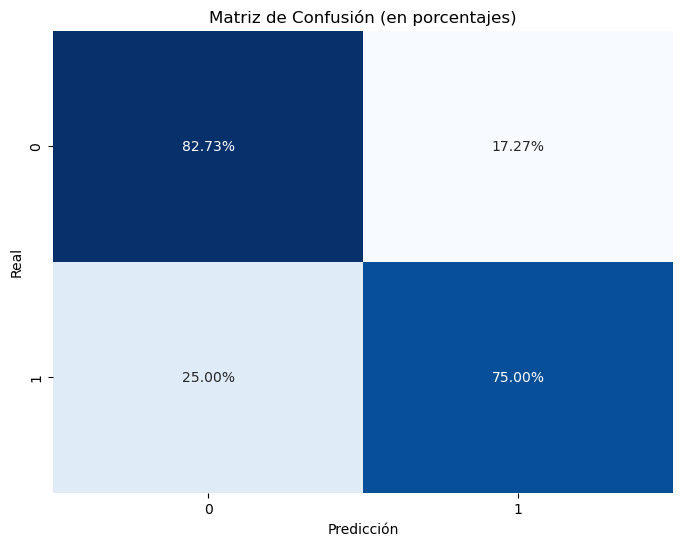

In [16]:
cm_relative = cm_absolutes.astype('float') / cm_absolutes.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_relative, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión (en porcentajes)")
plt.show()

In [17]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

## Accuracy

In [18]:
print(clf.score(X_test, y_test))

0.797752808988764


## Precision


In [19]:
precision = precision_score(y_test, y_pred)
print(precision)

0.7285714285714285


## Recall

In [20]:
recall = recall_score(y_test, y_pred)
print(recall)


0.75


## Specificity

In [21]:
TN, FP, FN, TP = cm_absolutes.ravel()
specificity = TN / (TN + FP)
print(specificity)

0.8272727272727273


## Matriz de coste

In [22]:

# Descomponer la matriz de confusión en elementos TN, FP, FN, TP
TN, FP, FN, TP = cm_absolutes.ravel()

# Definir la matriz de coste
cost_matrix = [-1, 100, 1, 0]

# Calcular el coste total usando los valores de la matriz de coste
total_cost = (TN * cost_matrix[0]) + (FN * cost_matrix[1]) + (FP * cost_matrix[2]) + (TP * cost_matrix[3])

print("Coste total del modelo:", total_cost)


Coste total del modelo: 1628


## Curva ROC

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

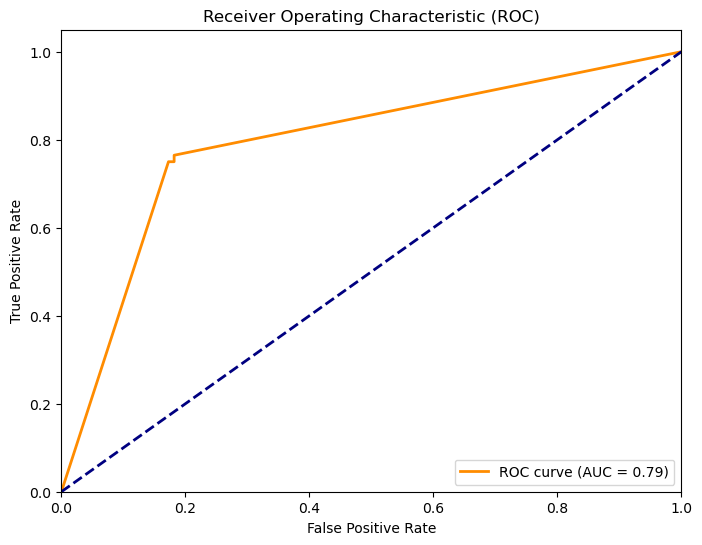

In [24]:
y_probs = clf.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Paso 1: Calcular los valores FPR y TPR
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Paso 2: Calcular el AUC (Área bajo la curva)
roc_auc = auc(fpr, tpr)

# Paso 3: Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (equilibrio)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [25]:
print(f"AUC: {roc_auc:.2f}")

AUC: 0.79


## Curva de ganancias

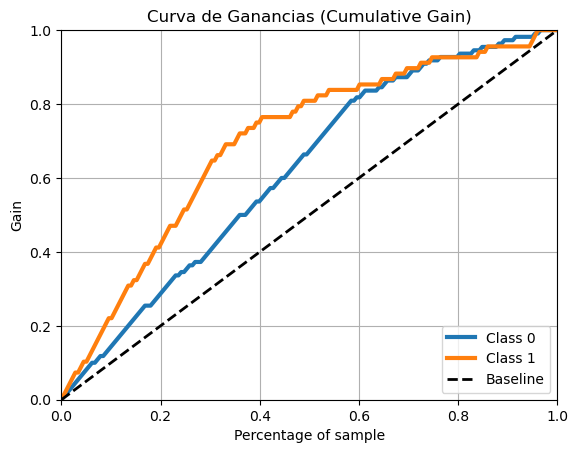

In [29]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_probs = clf.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probs)

plt.title('Curva de Ganancias (Cumulative Gain)')
plt.show()

## Lift curve

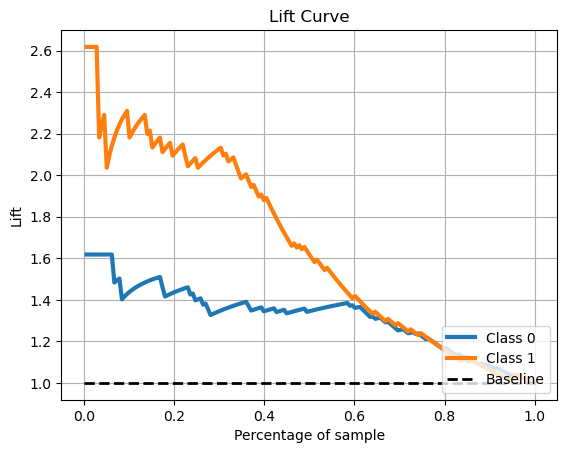

In [30]:
skplt.metrics.plot_lift_curve(y_test, y_probs)
plt.show()